In [78]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import random
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from sklearn import metrics
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [79]:
nltk.download('gutenberg')
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [80]:
text=nltk.corpus.gutenberg.raw('chesterton-thursday.txt')
tokenized_sents=nltk.sent_tokenize(text)

In [81]:
#global dataFrameT
dataFrameT = pd.DataFrame()

In [82]:
def listToString(s): 
  text = " ".join(s)
  return text

In [83]:
def stringOrList(x):
  if type(x) == str:
   textDataPartitioning(x)

  elif type(x) == list:
    for i in range(len(x)):
      textDataPartitioning(x[i])

In [84]:
def stemming_text(words):
  stemmer = PorterStemmer()
  # words = text.split()
  words = [stemmer.stem(word.strip()) for word in words]
  return " ".join(words)

In [85]:
def lemm_text(words):
  lemmatizer = WordNetLemmatizer()
  # words = text.split()
  words = [lemmatizer.lemmatize(word, pos='v') for word in words]
  return " ".join(words)

In [86]:
def textDataPartitioning(x): 
 text = nltk.corpus.gutenberg.raw(x)
 stop_words = set(stopwords.words('english')) 

 text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
 text = re.sub(r'[\d_]', '', text)

 print("--- removing stop words ---")           #stop words must be removed first
 word_tokens = word_tokenize(text)
 filtered_words = [] 
 for w in word_tokens: 
     if w not in stop_words: 
         filtered_words.append(w)

 print("--- stemming ---")                       #stemming is supposed to show better performance than lemmatization but we will test both
 new_text = stemming_text(filtered_words)

#  print("--- lemmatization ---") 
#  new_text = lemm_text(filtered_words)

 filtered_sentence = (new_text.strip()).split()

 temp = []
 list_of_lists = []
 list_of_lists1 = []
 index=0

 for word in filtered_sentence:
   temp.append(word)
   if len(temp) == 100:
    list_of_lists.append(temp)
    temp=[]

 for i in range(200):
  ran = random.randint(0, len(list_of_lists)-1)
  list_of_lists1.append([listToString(list_of_lists[ran]), x])

 dataFrame = pd.DataFrame(list_of_lists1, columns=["partition", "book"])
 global dataFrameT  
 dataFrameT = dataFrameT.append(dataFrame, ignore_index = True)


In [87]:
def string_to_integer(s):
  mydict={}
  i = 0
  for item in s.unique():
    if(i>0 and item in mydict):
        continue
    else:    
       i = i+1
       mydict[item] = i
  k=[]
  for item in s:
    k.append(mydict[item])
  return k

In [88]:
#list of 100 words in first column
# book_list = nltk.corpus.gutenberg.fileids()
# random_book_index = random.sample(range(0, len(book_list) - 1), 5)         # get 5 random books

# book_list = ['chesterton-thursday.txt', 'austen-emma.txt']

# romance_genre = ['austen-persuasion.txt', 'austen-sense.txt']              # same authher can't be used
poetry_genre = ['blake-poems.txt', 'milton-paradise.txt', 'whitman-leaves.txt']
fiction_genre = ['burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-thursday.txt', 'melville-moby_dick.txt']
# tragedy_genre = ['shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt']    # same author can't be used


# random_book_list = []

# for i in random_book_index:
#   random_book_list.append(book_list[i])

stringOrList(fiction_genre)
print(dataFrameT)

--- removing stop words ---
--- stemming ---
--- removing stop words ---
--- stemming ---
--- removing stop words ---
--- stemming ---
--- removing stop words ---
--- stemming ---
--- removing stop words ---
--- stemming ---
                                             partition                     book
0    thing buster bear billi mink grandfath frog je...  burgess-busterbrown.txt
1    boy lunch berri thing go wrong spite smile bes...  burgess-busterbrown.txt
2    feet last handl broke free shook jump helpless...  burgess-busterbrown.txt
3    uncomfort sammi jay call everybodi within hear...  burgess-busterbrown.txt
4    heedless bad said though didnt let grandfath f...  burgess-busterbrown.txt
..                                                 ...                      ...
995  head oilbutt lash floor centrepiec forecastl s...   melville-moby_dick.txt
996  madden yesterday fresh iron corrod mobi dick s...   melville-moby_dick.txt
997  widow shake sleet iceglaz hat jacket seat near... 

In [89]:
DataFrameOrg = dataFrameT.copy()

In [90]:
dataFrameT = DataFrameOrg.copy()   #use this line to get the same data you got before 

In [91]:
dataFrameT['word_count'] = dataFrameT["partition"].apply(lambda x: len(str(x).split(" ")))
dataFrameT['char_count'] = dataFrameT["partition"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
dataFrameT['sentence_count'] = dataFrameT["partition"].apply(lambda x: len(str(x).split(".")))
dataFrameT['avg_word_length'] = dataFrameT['char_count'] / dataFrameT['word_count']
dataFrameT['avg_sentence_lenght'] = dataFrameT['word_count'] / dataFrameT['sentence_count']
dataFrameT['Author'] = dataFrameT['book'].apply(lambda x: x.split('-')[0])
dataFrameT

,partition,book,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,Author
0,thing buster bear billi mink grandfath frog je...,burgess-busterbrown.txt,100,471,1,4.71,100.0,burgess
1,boy lunch berri thing go wrong spite smile bes...,burgess-busterbrown.txt,100,472,1,4.72,100.0,burgess
2,feet last handl broke free shook jump helpless...,burgess-busterbrown.txt,100,455,1,4.55,100.0,burgess
3,uncomfort sammi jay call everybodi within hear...,burgess-busterbrown.txt,100,470,1,4.70,100.0,burgess
4,heedless bad said though didnt let grandfath f...,burgess-busterbrown.txt,100,491,1,4.91,100.0,burgess
...,...,...,...,...,...,...,...,...
995,head oilbutt lash floor centrepiec forecastl s...,melville-moby_dick.txt,100,548,1,5.48,100.0,melville
996,madden yesterday fresh iron corrod mobi dick s...,melville-moby_dick.txt,100,483,1,4.83,100.0,melville
997,widow shake sleet iceglaz hat jacket seat near...,melville-moby_dick.txt,100,522,1,5.22,100.0,melville
998,boot dont hasnt got hammock ive seen lay night...,melville-moby_dick.txt,100,451,1,4.51,100.0,melville


In [92]:
from textblob import TextBlob
dataFrameT["Sentiment"] = dataFrameT["partition"].apply(lambda x: 
                   TextBlob(x).sentiment.polarity)
dataFrameT

,partition,book,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,Author,Sentiment
0,thing buster bear billi mink grandfath frog je...,burgess-busterbrown.txt,100,471,1,4.71,100.0,burgess,0.269643
1,boy lunch berri thing go wrong spite smile bes...,burgess-busterbrown.txt,100,472,1,4.72,100.0,burgess,0.048912
2,feet last handl broke free shook jump helpless...,burgess-busterbrown.txt,100,455,1,4.55,100.0,burgess,0.202500
3,uncomfort sammi jay call everybodi within hear...,burgess-busterbrown.txt,100,470,1,4.70,100.0,burgess,-0.033030
4,heedless bad said though didnt let grandfath f...,burgess-busterbrown.txt,100,491,1,4.91,100.0,burgess,0.104167
...,...,...,...,...,...,...,...,...,...
995,head oilbutt lash floor centrepiec forecastl s...,melville-moby_dick.txt,100,548,1,5.48,100.0,melville,0.114815
996,madden yesterday fresh iron corrod mobi dick s...,melville-moby_dick.txt,100,483,1,4.83,100.0,melville,0.017628
997,widow shake sleet iceglaz hat jacket seat near...,melville-moby_dick.txt,100,522,1,5.22,100.0,melville,-0.184615
998,boot dont hasnt got hammock ive seen lay night...,melville-moby_dick.txt,100,451,1,4.51,100.0,melville,0.023148


In [93]:
dataFrameT.shape

(1000, 9)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


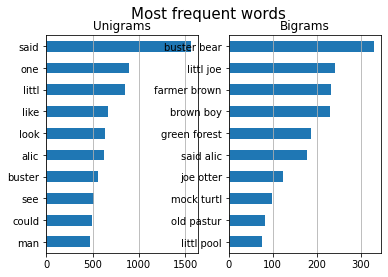

In [94]:
top=10
nltk.download('punkt')
## for vectorizer
from sklearn import feature_extraction, manifold

corpus = dataFrameT["partition"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Most frequent words", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

Visualization:

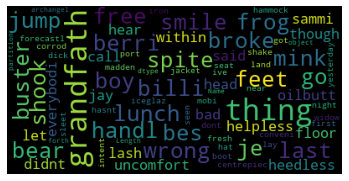

In [95]:
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(str(corpus))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [96]:
import seaborn as sp
def plott(label,y_pred):
  clf_report = classification_report(label,
                                   y_pred,
                                   target_names=['burgess','carroll','chesterton','melville'],
                                   output_dict=True)
  print('\nConfusion Matrix:\n' )
  print(multilabel_confusion_matrix(label, y_pred))
  sp.heatmap(confusion_matrix(label, y_pred))
  plt.show()
  print('\nClassification Report:\n' )
  print(classification_report(label, y_pred))
  sp.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
  plt.show()

In [97]:
import matplotlib.pyplot as plt
def funp(y,yp):
  plt.plot(y,'x')
  plt.plot(yp, 'o')
  plt.show()

Tokenization and Transformation BOW

Count Vectorization with ngram

In [98]:
from sklearn.feature_extraction.text import CountVectorizer          # we will use the count vectorizer dataset as input as a first test
count_vect = CountVectorizer(ngram_range = (1, 2), max_features=2500)                   # you can change the number of n-grams while testing
X_train_counts = count_vect.fit_transform(dataFrameT["partition"])
print(X_train_counts.shape)

(1000, 2500)


In [99]:
dataset_countV = pd.DataFrame(X_train_counts.toarray(), columns = count_vect.get_feature_names())
sentiment = pd.DataFrame(data = dataFrameT.loc[:,"Sentiment"], columns = ['Sentiment'])
dataset_countV = dataset_countV.join(sentiment, rsuffix = '_score')
dataset_countV

,abl,abrupt,abruptli,absolut,absurd,accent,accid,accord,account,accus,acquaint,across,act,action,actual,ad,address,admir,admit,adopt,advanc,adventur,advic,advic littl,advis,affair,affect,afraid,afraid buster,afraid said,afterward,age,ago,agre,ah,ahab,ahead,air,alarm,alic,...,would like,would look,would natur,would never,would see,would wast,wouldnt,wow,wow wow,wrap,wrinkl,write,written,wrong,wrote,yard,yawn,ye,ye said,ye see,ye sir,yea,year,yell,yellow,yesterday,yet,yet said,yield,yojo,youd,youd better,youll,young,young man,your,your pretti,youth,youv,Sentiment
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.269643
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.048912
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.202500
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.033030
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.104167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.114815
996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.017628
997,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.184615
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.023148


In [100]:
count_vect.vocabulary_.get(u'algorithm')

Count Vectorization without ngram (BoW)

In [101]:
count_v = CountVectorizer(max_features=2500)
X_train_counts_v = count_v.fit_transform(dataFrameT["partition"])
print(X_train_counts_v.shape)

(1000, 2500)


In [102]:
dataset_CV_without_ngram = pd.DataFrame(X_train_counts_v.toarray(), columns = count_v.get_feature_names())
dataset_CV_without_ngram = dataset_CV_without_ngram.join(sentiment, rsuffix = '_score')
dataset_CV_without_ngram

,abl,abrupt,abruptli,absolut,absurd,accent,accept,accid,accident,accord,account,accurs,accus,acquaint,across,act,action,activ,actor,actual,ad,addit,address,admir,admit,adopt,advanc,advantag,adventur,advic,advis,affair,affect,afford,afraid,aft,afternoon,afterward,age,ago,...,word,wore,work,world,worm,worri,wors,worship,worst,worth,would,wouldnt,wound,wow,wrap,wretch,wrinkl,write,written,wrong,wrote,yard,yawn,ye,yea,year,yell,yellow,yer,yesterday,yet,yield,yojo,youd,youll,young,your,youth,youv,Sentiment
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.269643
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.048912
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.202500
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.033030
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.104167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.114815
996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.017628
997,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.184615
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.023148


# TFIDF Vectorization

### TFIDF Vectoriation with n-grams

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer          # we will use the TFIDF vectorizer with n-grams dataset as input as a second test
tfidf_vectorizer_ngram = TfidfVectorizer(use_idf=True, ngram_range = (1, 2), max_features = 2500) 
X_train_tfidf_ngram = tfidf_vectorizer_ngram.fit_transform(dataFrameT["partition"])
X_train_tfidf_ngram.shape

(1000, 2500)

In [104]:
dataset_tfidfV_ngram = pd.DataFrame(X_train_tfidf_ngram.toarray(), columns = tfidf_vectorizer_ngram.get_feature_names())
dataset_tfidfV_ngram = dataset_tfidfV_ngram.join(sentiment, rsuffix = '_score')
dataset_tfidfV_ngram

,abl,abrupt,abruptli,absolut,absurd,accent,accid,accord,account,accus,acquaint,across,act,action,actual,ad,address,admir,admit,adopt,advanc,adventur,advic,advic littl,advis,affair,affect,afraid,afraid buster,afraid said,afterward,age,ago,agre,ah,ahab,ahead,air,alarm,alic,...,would like,would look,would natur,would never,would see,would wast,wouldnt,wow,wow wow,wrap,wrinkl,write,written,wrong,wrote,yard,yawn,ye,ye said,ye see,ye sir,yea,year,yell,yellow,yesterday,yet,yet said,yield,yojo,youd,youd better,youll,young,young man,your,your pretti,youth,youv,Sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.269643
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.069135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081424,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.100198,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.078901,0.0,0.0,0.0,0.0,0.0,0.048912
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.093409,0.000000,0.0,0.0,0.0,0.0,0.0,0.202500
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-0.033030
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.089535,0.107299,0.107299,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.055148,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.104167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.111352,0.101896,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.114815
996,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100875,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.130618,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.017628
997,0.0,0.0,0.0,0.0,0.0,0.0,0.127038,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.132852,

TFIDF Vectoriation without n-grams

In [105]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features=2500)          # we will use the TFIDF vectorizer without n-grmas dataset as input as a third test
X_train_tfidf = tfidf_vectorizer.fit_transform(dataFrameT["partition"])
X_train_tfidf.shape

(1000, 2500)

In [106]:
dataset_tfidfV = pd.DataFrame(X_train_tfidf.toarray(), columns = tfidf_vectorizer.get_feature_names())
dataset_tfidfV = dataset_tfidfV.join(sentiment, rsuffix = '_score')
dataset_tfidfV

,abl,abrupt,abruptli,absolut,absurd,accent,accept,accid,accident,accord,account,accurs,accus,acquaint,across,act,action,activ,actor,actual,ad,addit,address,admir,admit,adopt,advanc,advantag,adventur,advic,advis,affair,affect,afford,afraid,aft,afternoon,afterward,age,ago,...,word,wore,work,world,worm,worri,wors,worship,worst,worth,would,wouldnt,wound,wow,wrap,wretch,wrinkl,write,written,wrong,wrote,yard,yawn,ye,yea,year,yell,yellow,yer,yesterday,yet,yield,yojo,youd,youll,young,your,youth,youv,Sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.269643
1,0.0,0.0,0.0,0.0,0.0,0.0,0.122067,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.073333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.079188,0.0,0.0,0.0,0.096595,0.0,0.0,0.0,0.044432,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.086369,0.0,0.0,0.0,0.000000,0.0,0.0,0.106283,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.083692,0.0,0.0,0.0,0.048912
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.046765,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.100866,0.000000,0.0,0.0,0.0,0.202500
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.043466,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,-0.033030
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.107365,0.128666,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.166938,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.046834,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.066131,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.104167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101374,0.092765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.114815
996,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.128449,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.017628
997,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.120764,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

# Shuffling data

### count vectorizer with ngram

In [107]:
# first we join the author column
author = dataFrameT["Author"]
dataset_countV = dataset_countV.join(author, rsuffix = "_")

# then we shuffle the data
dataset_countV = dataset_countV.sample(frac = 1)

# then we split the input and the target
dataset_countV_target = dataset_countV['Author']
dataset_countV_input = dataset_countV.drop(columns = ['Author'])

# dataset_countV_target

### count vectorizer without ngram

In [108]:
# first we join the author column
dataset_CV_without_ngram = dataset_CV_without_ngram.join(author, rsuffix = "_")

# then we shuffle the data
dataset_CV_without_ngram = dataset_CV_without_ngram.sample(frac = 1)

# then we split the input and the target
dataset_CV_without_ngram_target = dataset_CV_without_ngram['Author']
dataset_CV_without_ngram_input = dataset_CV_without_ngram.drop(columns = ['Author'])

# dataset_countV_target

### TFIDF with ngrams

In [109]:
# first we join the author column
dataset_tfidfV_ngram = dataset_tfidfV_ngram.join(author, rsuffix = "_")

# then we shuffle the data
dataset_tfidfV_ngram = dataset_tfidfV_ngram.sample(frac = 1)

# then we split the input and the target
dataset_tfidfV_ngram_target = dataset_tfidfV_ngram['Author']
dataset_tfidfV_ngram_input = dataset_tfidfV_ngram.drop(columns = ['Author'])

# dataset_tfidfV_ngram_target

### TFIDF without ngrams

In [110]:
# first we join the author column
dataset_tfidfV = dataset_tfidfV.join(author, rsuffix = "_")

# then we shuffle the data
dataset_tfidfV = dataset_tfidfV.sample(frac = 1)

# then we split the input and the target
dataset_tfidfV_target = dataset_tfidfV['Author']
dataset_tfidfV_input = dataset_tfidfV.drop(columns = ['Author'])

# dataset_tfidfV_input

In [111]:
>>> from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset_countV_input = scaler.fit_transform(dataset_countV_input)
dataset_tfidfV_ngram_input = scaler.fit_transform(dataset_tfidfV_ngram_input)
dataset_tfidfV_input = scaler.fit_transform(dataset_tfidfV_input)
dataset_CV_without_ngram_input = scaler.fit_transform(dataset_CV_without_ngram_input)


## Splitting the data

In [112]:
from sklearn.model_selection import train_test_split

#count vectorizer with ngram
X_train_countV, X_test_countV, y_train_countV, y_test_countV = train_test_split(dataset_countV_input, dataset_countV_target, test_size=0.4, random_state=0)

#tfidf with ngrams
X_train_tfidfV_ngram, X_test_tfidfV_ngram, y_train_tfidfV_ngram, y_test_tfidfV_ngram = train_test_split(dataset_tfidfV_ngram_input, dataset_tfidfV_ngram_target, test_size=0.4, random_state=0)

#tdidf without ngrams
X_train_tfidfV, X_test_tfidfV, y_train_tfidfV, y_test_tfidfV = train_test_split(dataset_tfidfV_input, dataset_tfidfV_target, test_size=0.4, random_state=0)

#count vectorizer without ngram
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(dataset_CV_without_ngram_input, dataset_CV_without_ngram_target, test_size=0.4, random_state=0)

# Support vector machine Classification

counter Vectorization

In [113]:
# cross_validation
clf = SVC(kernel= 'linear').fit(X_train_countV, y_train_countV)
print('accuracy of cross validation: ', cross_val_score(clf, X_train_countV, y_train_countV, cv=10).mean())
dataSVCCV=clf.predict(X_test_countV)
#y_test_countV
print ('accuracy of test: {}'.format(clf.score(X_test_countV, y_test_countV)))


accuracy of cross validation:  0.99
accuracy of test: 0.985


In [114]:
#y_test_countV


Confusion Matrix:

[[[322   0]
  [  0  78]]

 [[312   1]
  [  0  87]]

 [[232   3]
  [  2 163]]

 [[328   2]
  [  4  66]]]


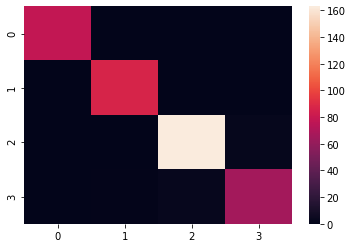


Classification Report:

              precision    recall  f1-score   support

     burgess       1.00      1.00      1.00        78
     carroll       0.99      1.00      0.99        87
  chesterton       0.98      0.99      0.98       165
    melville       0.97      0.94      0.96        70

    accuracy                           0.98       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



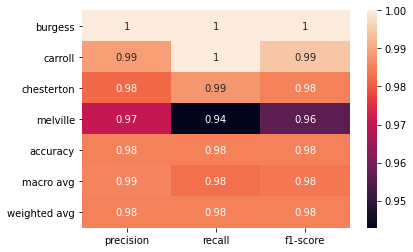

In [115]:
plott(dataSVCCV,y_test_countV)

TF-IDF

In [116]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.svm import SVC
import numpy as np
# cross_validation
clf = SVC(kernel= 'linear').fit(X_train_tfidfV, y_train_tfidfV)
print('accuracy of cross validation: ', cross_val_score(clf, X_train_tfidfV, y_train_tfidfV, cv=10).mean())

# Evaluation
predicted = clf.predict(X_test_tfidfV)
# print(np.mean(predicted == y_test_tfidfV))
print ('accuracy of test: {}'.format(clf.score(X_test_tfidfV, y_test_tfidfV)))

accuracy of cross validation:  0.9899999999999999
accuracy of test: 0.99



Confusion Matrix:

[[[324   0]
  [  0  76]]

 [[327   0]
  [  0  73]]

 [[224   2]
  [  2 172]]

 [[321   2]
  [  2  75]]]


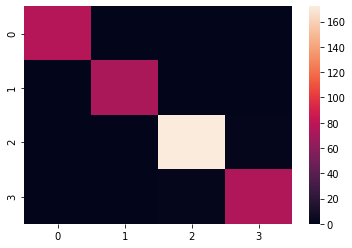


Classification Report:

              precision    recall  f1-score   support

     burgess       1.00      1.00      1.00        76
     carroll       1.00      1.00      1.00        73
  chesterton       0.99      0.99      0.99       174
    melville       0.97      0.97      0.97        77

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



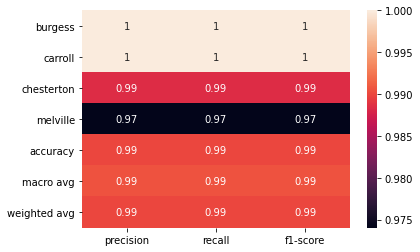

In [117]:
plott(predicted,y_test_tfidfV)

In [118]:
# import seaborn as sns
# x=predicted.transpose()
# sns.boxplot(x)
# plt.show()

TF-IDF/N-Grams

In [119]:
clf = SVC(kernel= 'linear').fit(X_train_tfidfV_ngram, y_train_tfidfV_ngram)
print('accuracy of cross validation: ', cross_val_score(clf, X_train_tfidfV_ngram, y_train_tfidfV_ngram, cv=10).mean())
predicted1 = clf.predict(X_test_tfidfV_ngram)
print ('accuracy of test: {}'.format(clf.score(X_test_tfidfV_ngram, y_test_tfidfV_ngram)))

accuracy of cross validation:  0.9816666666666667
accuracy of test: 0.9925


In [120]:
pip install mlxtend --upgrade --no-deps

Requirement already up-to-date: mlxtend in /usr/local/lib/python3.7/dist-packages (0.18.0)


In [121]:
 from mlxtend.evaluate import bias_variance_decomp
X_train_tfidfV_ngram, X_test_tfidfV_ngram, y_train_tfidfV_ngram, y_test_tfidfV_ngram = train_test_split(X_train_tfidf_ngram , dataset_tfidfV_ngram_target, test_size=0.4, random_state=0)

# # estimate bias and variance
clf = SVC(kernel= 'linear')
mse, bias, var = bias_variance_decomp(clf, X_train_tfidfV_ngram, np.array(string_to_integer(y_train_tfidfV_ngram)), X_test_tfidfV_ngram, np.array(string_to_integer(y_test_tfidfV_ngram)), loss='mse', num_rounds=200, random_seed=1)
# # summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 2.001
Bias: 1.591
Variance: 0.410



Confusion Matrix:

[[[328   0]
  [  0  72]]

 [[318   0]
  [  0  82]]

 [[226   2]
  [  1 171]]

 [[325   1]
  [  2  72]]]


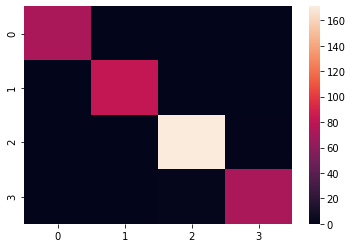


Classification Report:

              precision    recall  f1-score   support

     burgess       1.00      1.00      1.00        72
     carroll       1.00      1.00      1.00        82
  chesterton       0.99      0.99      0.99       172
    melville       0.99      0.97      0.98        74

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



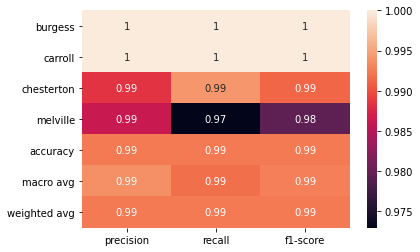

In [122]:
plott(predicted1,y_test_tfidfV_ngram)

count vectorizer without N-gram

In [123]:
clf = SVC(kernel= 'linear').fit(X_train_cv, y_train_cv)
print('accuracy of cross validation: ', cross_val_score(clf, X_train_cv, y_train_cv, cv=10).mean())
predicted1 = clf.predict(X_test_cv)
print ('accuracy of test: {}'.format(clf.score(X_test_cv, y_test_cv)))

accuracy of cross validation:  0.99
accuracy of test: 0.9925



Confusion Matrix:

[[[315   0]
  [  0  85]]

 [[317   1]
  [  0  82]]

 [[241   1]
  [  1 157]]

 [[324   1]
  [  2  73]]]


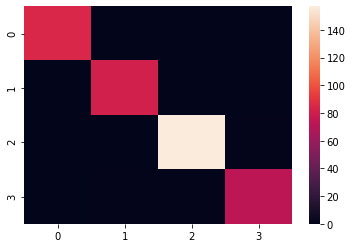


Classification Report:

              precision    recall  f1-score   support

     burgess       1.00      1.00      1.00        85
     carroll       0.99      1.00      0.99        82
  chesterton       0.99      0.99      0.99       158
    melville       0.99      0.97      0.98        75

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



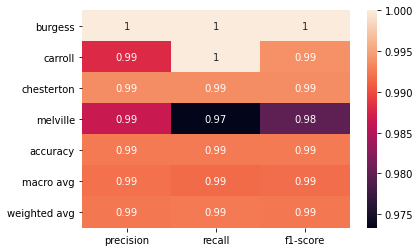

In [124]:
plott(predicted1,y_test_cv)

# Decision tree Model

Count vectorizer with ngram

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score, cross_val_predict

tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train_countV, y_train_countV)

scores = cross_val_score(tree_model, X_train_countV, y_train_countV, cv= 10 )
print('Accuracy of cross-validation: ' , scores.mean())

y_pred = tree_model.predict(X_test_countV)

print('Accuracy of test', tree_model.score(X_test_countV, y_test_countV))

#print('Accuracy of the model', accuracy_score(y_test_countV, y_pred))



Accuracy of cross-validation:  0.9566666666666667
Accuracy of test 0.9475



Confusion Matrix:

[[[320   2]
  [  0  78]]

 [[311   1]
  [  1  87]]

 [[226   8]
  [ 12 154]]

 [[322  10]
  [  8  60]]]


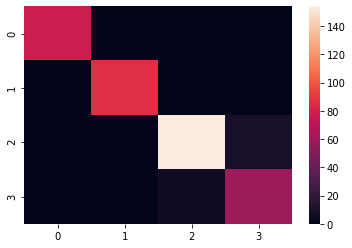


Classification Report:

              precision    recall  f1-score   support

     burgess       0.97      1.00      0.99        78
     carroll       0.99      0.99      0.99        88
  chesterton       0.95      0.93      0.94       166
    melville       0.86      0.88      0.87        68

    accuracy                           0.95       400
   macro avg       0.94      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



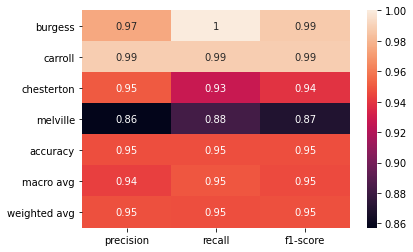

In [126]:
plott(y_test_countV, y_pred)

Count vectorizer without ngram

In [127]:
tree_model_cv = DecisionTreeClassifier(random_state=0)
tree_model_cv.fit(X_train_cv, y_train_cv)

scores = cross_val_score(tree_model_cv, X_train_cv, y_train_cv, cv= 10 )
print('Accuracy of cross-validation: ' , scores.mean())

y_pred = tree_model_cv.predict(X_test_cv)

print('Accuracy of test', tree_model_cv.score(X_test_cv, y_test_cv))

Accuracy of cross-validation:  0.95
Accuracy of test 0.9525



Confusion Matrix:

[[[315   0]
  [  0  85]]

 [[317   0]
  [  3  80]]

 [[227  15]
  [  4 154]]

 [[322   4]
  [ 12  62]]]


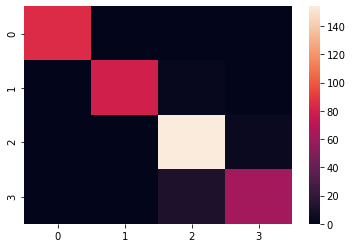


Classification Report:

              precision    recall  f1-score   support

     burgess       1.00      1.00      1.00        85
     carroll       1.00      0.96      0.98        83
  chesterton       0.91      0.97      0.94       158
    melville       0.94      0.84      0.89        74

    accuracy                           0.95       400
   macro avg       0.96      0.94      0.95       400
weighted avg       0.95      0.95      0.95       400



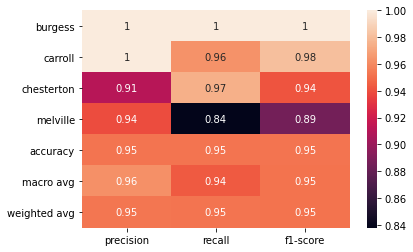

In [128]:
plott(y_test_cv, y_pred)

tfidf with ngrams

In [129]:
tree_model_tf_n = DecisionTreeClassifier(random_state=0)
tree_model_tf_n.fit(X_train_tfidfV_ngram, y_train_tfidfV_ngram)

scores = cross_val_score(tree_model_tf_n, X_train_tfidfV_ngram, y_train_tfidfV_ngram, cv= 10)
print('Accuracy of cross validation: ' , scores.mean())

y_pred = tree_model_tf_n.predict(X_test_tfidfV_ngram)

#print('Accuracy', accuracy_score(y_test_tfidfV_ngram, y_pred))

print('Accuracy of test', tree_model_tf_n.score(X_test_tfidfV_ngram, y_test_tfidfV_ngram))


Accuracy of cross validation:  0.2616666666666666
Accuracy of test 0.26



Confusion Matrix:

[[[244  84]
  [ 54  18]]

 [[251  67]
  [ 68  14]]

 [[133  94]
  [111  62]]

 [[276  51]
  [ 63  10]]]


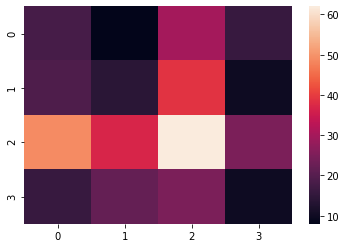


Classification Report:

              precision    recall  f1-score   support

     burgess       0.18      0.25      0.21        72
     carroll       0.17      0.17      0.17        82
  chesterton       0.40      0.36      0.38       173
    melville       0.16      0.14      0.15        73

    accuracy                           0.26       400
   macro avg       0.23      0.23      0.23       400
weighted avg       0.27      0.26      0.26       400



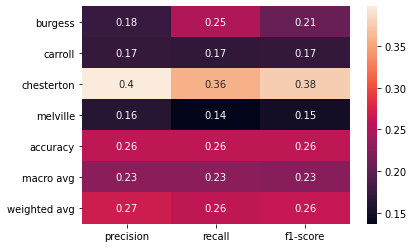

In [130]:
plott(y_test_tfidfV_ngram, y_pred)

tfidf without ngrams

In [131]:
tree_model_tf = DecisionTreeClassifier(random_state=0)
tree_model_tf.fit(X_train_tfidfV, y_train_tfidfV)

scores = cross_val_score(tree_model_tf, X_train_tfidfV, y_train_tfidfV, cv= 10)
print('Accuracy of cross validation: ' , scores.mean())

y_pred = tree_model_tf.predict(X_test_tfidfV)

#print('Accuracy', accuracy_score(y_test_tfidfV, y_pred))

print('Accuracy of test', tree_model_tf.score(X_test_tfidfV, y_test_tfidfV))


Accuracy of cross validation:  0.9349999999999999
Accuracy of test 0.96



Confusion Matrix:

[[[323   1]
  [  0  76]]

 [[326   1]
  [  1  72]]

 [[218   8]
  [  7 167]]

 [[317   6]
  [  8  69]]]


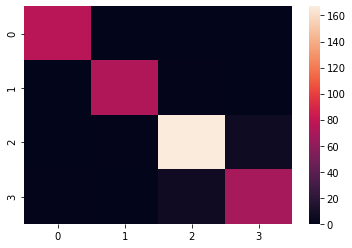


Classification Report:

              precision    recall  f1-score   support

     burgess       0.99      1.00      0.99        76
     carroll       0.99      0.99      0.99        73
  chesterton       0.95      0.96      0.96       174
    melville       0.92      0.90      0.91        77

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



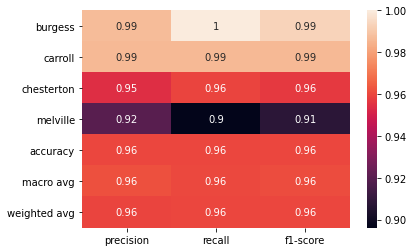

In [132]:
plott(y_test_tfidfV, y_pred)

# **K-nearest neighbor model**

KNN with count vectorization and N-Gram


In [133]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors= 3, weights='distance')
neigh.fit(X_train_countV, y_train_countV)
print('cross validation accuracy: ', cross_val_score(neigh, X_train_countV, y_train_countV, cv=10).mean())
predicted = neigh.predict(X_test_countV)
print ('accuracy of test: {}'.format(np.mean(predicted == y_test_countV)))

cross validation accuracy:  0.7066666666666668
accuracy of test: 0.665



Confusion Matrix:

[[[322   0]
  [ 18  60]]

 [[312   0]
  [ 36  52]]

 [[229   5]
  [ 79  87]]

 [[203 129]
  [  1  67]]]


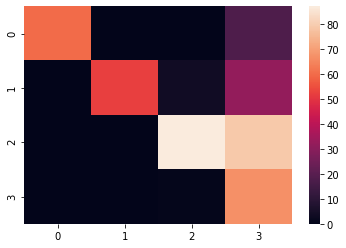


Classification Report:

              precision    recall  f1-score   support

     burgess       1.00      0.77      0.87        78
     carroll       1.00      0.59      0.74        88
  chesterton       0.95      0.52      0.67       166
    melville       0.34      0.99      0.51        68

    accuracy                           0.67       400
   macro avg       0.82      0.72      0.70       400
weighted avg       0.87      0.67      0.70       400



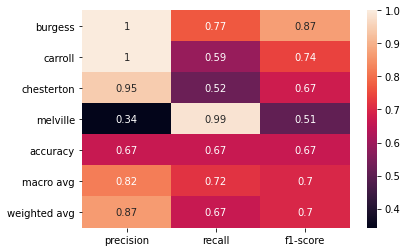

In [134]:
plott(y_test_countV,predicted)

KNN with TF-IDF

In [135]:
neigh = KNeighborsClassifier(n_neighbors= 3, weights='distance')
neigh.fit(X_train_tfidfV, y_train_tfidfV)
print('cross validation accuracy: ', cross_val_score(neigh, X_train_tfidfV, y_train_tfidfV, cv=10).mean())
predicted = neigh.predict(X_test_tfidfV)
print ('accuracy of test: {}'.format(np.mean(predicted == y_test_tfidfV)))

cross validation accuracy:  0.6883333333333334
accuracy of test: 0.66



Confusion Matrix:

[[[324   0]
  [  2  74]]

 [[246  81]
  [  3  70]]

 [[226   0]
  [112  62]]

 [[268  55]
  [ 19  58]]]


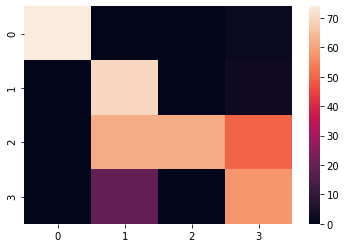


Classification Report:

              precision    recall  f1-score   support

     burgess       1.00      0.97      0.99        76
     carroll       0.46      0.96      0.62        73
  chesterton       1.00      0.36      0.53       174
    melville       0.51      0.75      0.61        77

    accuracy                           0.66       400
   macro avg       0.74      0.76      0.69       400
weighted avg       0.81      0.66      0.65       400



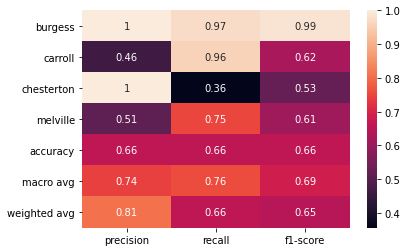

In [136]:
plott(y_test_tfidfV,predicted)

KNN with TF-IDF/N-Gram

In [137]:
neigh = KNeighborsClassifier(n_neighbors=3, weights='distance')
neigh.fit(X_train_tfidfV_ngram, y_train_tfidfV_ngram)
print('Cross validation accuracy: ', cross_val_score(neigh, X_train_tfidfV_ngram, y_train_tfidfV_ngram, cv=10).mean())
predicted = neigh.predict(X_test_tfidfV_ngram)
print ('accuracy of test: {}'.format(np.mean(predicted == y_test_tfidfV_ngram)))

Cross validation accuracy:  0.25833333333333336
accuracy of test: 0.2825



Confusion Matrix:

[[[252  76]
  [ 51  21]]

 [[246  72]
  [ 68  14]]

 [[135  92]
  [110  63]]

 [[280  47]
  [ 58  15]]]


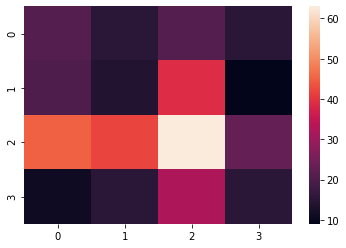


Classification Report:

              precision    recall  f1-score   support

     burgess       0.22      0.29      0.25        72
     carroll       0.16      0.17      0.17        82
  chesterton       0.41      0.36      0.38       173
    melville       0.24      0.21      0.22        73

    accuracy                           0.28       400
   macro avg       0.26      0.26      0.26       400
weighted avg       0.29      0.28      0.29       400



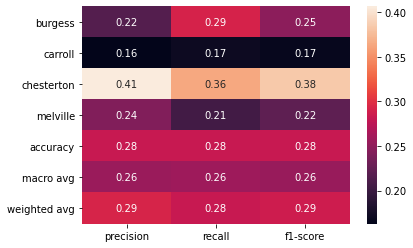

In [138]:
plott(y_test_tfidfV_ngram,predicted)

KNN with count Vectorizer


In [139]:
neigh = KNeighborsClassifier(n_neighbors=3, weights='distance', p=1)
neigh.fit(X_train_cv, y_train_cv)
print('cross validation accuracy: ', cross_val_score(neigh, X_train_cv, y_train_cv, cv=10).mean())
predicted = neigh.predict(X_test_cv)
print ('accuracy of test: {}'.format(np.mean(predicted == y_test_cv)))

cross validation accuracy:  0.7416666666666667
accuracy of test: 0.7525



Confusion Matrix:

[[[314   1]
  [  0  85]]

 [[314   3]
  [  7  76]]

 [[242   0]
  [ 90  68]]

 [[231  95]
  [  2  72]]]


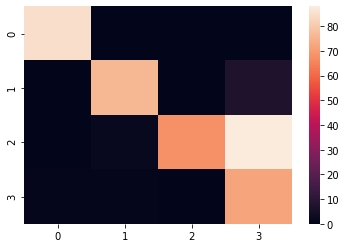


Classification Report:

              precision    recall  f1-score   support

     burgess       0.99      1.00      0.99        85
     carroll       0.96      0.92      0.94        83
  chesterton       1.00      0.43      0.60       158
    melville       0.43      0.97      0.60        74

    accuracy                           0.75       400
   macro avg       0.85      0.83      0.78       400
weighted avg       0.88      0.75      0.75       400



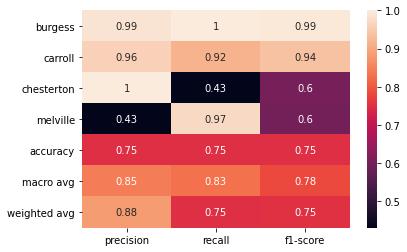

In [140]:
plott(y_test_cv,predicted)

# Decrease model by 20%  Support vector machine Classification - TF-IDF/N-
#From 100 word to 20 word
 

In [141]:
dataFrameT = pd.DataFrame()
def stringOrList1(x):
  if type(x) == str:
   textDataPartitioning(x)

  elif type(x) == list:
    for i in range(len(x)):
      textDataPartitioning1(x[i])

def textDataPartitioning1(x): 
 text = nltk.corpus.gutenberg.raw(x)
 stop_words = set(stopwords.words('english')) 

 text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
 text = re.sub(r'[\d_]', '', text)

 print("--- removing stop words ---")           #stop words must be removed first
 word_tokens = word_tokenize(text)
 filtered_words = [] 
 for w in word_tokens: 
     if w not in stop_words: 
         filtered_words.append(w)

#  print("--- stemming ---")                       #stemming is supposed to show better performance than lemmatization but we will test both
#  new_text = stemming_text(filtered_words)

 print("--- lemmatization ---") 
 new_text = lemm_text(filtered_words)

 filtered_sentence = (new_text.strip()).split()

 temp = []
 list_of_lists = []
 list_of_lists1 = []
 index=0

 for word in filtered_sentence:
   temp.append(word)
   if len(temp) == 20:
    list_of_lists.append(temp)
    temp=[]

 lenght = 0

 for i in range(200):
  ran = random.randint(0, len(list_of_lists)-1)
  list_of_lists1.append([listToString(list_of_lists[ran]), x])

 dataFrame = pd.DataFrame(list_of_lists1, columns=["partition", "book"])
 global dataFrameT  
 dataFrameT = dataFrameT.append(dataFrame, ignore_index = True)


poetry_genre = ['blake-poems.txt', 'milton-paradise.txt', 'whitman-leaves.txt']
fiction_genre = ['burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-thursday.txt', 'melville-moby_dick.txt']
stringOrList1(fiction_genre)
dataFrameT['word_count'] = dataFrameT["partition"].apply(lambda x: len(str(x).split(" ")))
dataFrameT['char_count'] = dataFrameT["partition"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
dataFrameT['sentence_count'] = dataFrameT["partition"].apply(lambda x: len(str(x).split(".")))
dataFrameT['avg_word_length'] = dataFrameT['char_count'] / dataFrameT['word_count']
dataFrameT['avg_sentence_lenght'] = dataFrameT['word_count'] / dataFrameT['sentence_count']
dataFrameT['Author'] = dataFrameT['book'].apply(lambda x: x.split('-')[0])
from textblob import TextBlob
dataFrameT["Sentiment"] = dataFrameT["partition"].apply(lambda x: 
                   TextBlob(x).sentiment.polarity)
from sklearn.feature_extraction.text import TfidfVectorizer          # we will use the TFIDF vectorizer with n-grams dataset as input as a second test
tfidf_vectorizer_ngram = TfidfVectorizer(use_idf=True, ngram_range = (1, 2), max_features = 2500) 
X_train_tfidf_ngram = tfidf_vectorizer_ngram.fit_transform(dataFrameT["partition"])
X_train_tfidf_ngram.shape
dataset_tfidfV_ngram = pd.DataFrame(X_train_tfidf_ngram.toarray(), columns = tfidf_vectorizer_ngram.get_feature_names())
dataset_tfidfV_ngram = dataset_tfidfV_ngram.join(sentiment, rsuffix = '_score')
tfidf_vectorizer = TfidfVectorizer(use_idf=True , max_features = 2500)          # we will use the TFIDF vectorizer without n-grmas dataset as input as a third test
X_train_tfidf = tfidf_vectorizer.fit_transform(dataFrameT["partition"])
dataset_tfidfV = pd.DataFrame(X_train_tfidf.toarray(), columns = tfidf_vectorizer.get_feature_names())
dataset_tfidfV = dataset_tfidfV.join(sentiment, rsuffix = '_score')
# first we join the author column
author = dataFrameT["Author"]
dataset_countV = dataset_countV.join(author, rsuffix = "_")

# then we shuffle the data
dataset_countV = dataset_countV.sample(frac = 1)

# then we split the input and the target
dataset_countV_target = dataset_countV['Author']
dataset_countV_input = dataset_countV.drop(columns = ['Author'])

# dataset_countV_target
# first we join the author column
dataset_tfidfV_ngram = dataset_tfidfV_ngram.join(author, rsuffix = "_")

# then we shuffle the data
dataset_tfidfV_ngram = dataset_tfidfV_ngram.sample(frac = 1)

# then we split the input and the target
dataset_tfidfV_ngram_target = dataset_tfidfV_ngram['Author']
dataset_tfidfV_ngram_input = dataset_tfidfV_ngram.drop(columns = ['Author'])

# dataset_tfidfV_ngram_target



from sklearn.model_selection import train_test_split


#tfidf with ngrams
X_train_tfidfV_ngram, X_test_tfidfV_ngram, y_train_tfidfV_ngram, y_test_tfidfV_ngram = train_test_split(dataset_tfidfV_ngram_input, dataset_tfidfV_ngram_target, test_size=0.4, random_state=0)


--- removing stop words ---
--- lemmatization ---
--- removing stop words ---
--- lemmatization ---
--- removing stop words ---
--- lemmatization ---
--- removing stop words ---
--- lemmatization ---
--- removing stop words ---
--- lemmatization ---


cross validation accuracy:  0.8400000000000001
accuracy of test: 0.825

Confusion Matrix:

[[[327  14]
  [  0  59]]

 [[316  23]
  [  2  59]]

 [[173   4]
  [ 63 160]]

 [[314  29]
  [  5  52]]]


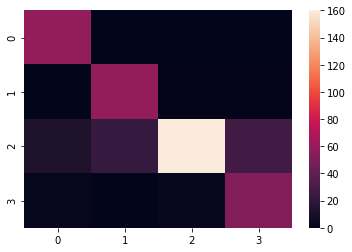


Classification Report:

              precision    recall  f1-score   support

     burgess       0.81      1.00      0.89        59
     carroll       0.72      0.97      0.83        61
  chesterton       0.98      0.72      0.83       223
    melville       0.64      0.91      0.75        57

    accuracy                           0.82       400
   macro avg       0.79      0.90      0.82       400
weighted avg       0.86      0.82      0.83       400



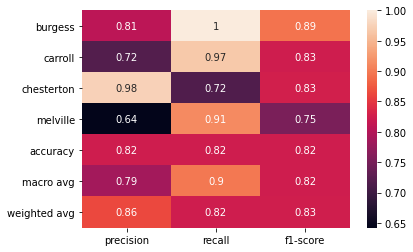

In [142]:

clf_dropped = SVC(kernel= 'linear').fit(X_train_tfidfV_ngram, y_train_tfidfV_ngram)
print('cross validation accuracy: ', cross_val_score(clf_dropped, X_train_tfidfV_ngram, y_train_tfidfV_ngram, cv=10).mean())
predicted1 = clf_dropped.predict(X_test_tfidfV_ngram)
print ('accuracy of test: {}'.format(clf_dropped.score(X_test_tfidfV_ngram, y_test_tfidfV_ngram)))
plott(predicted1,y_test_tfidfV_ngram)

In [162]:
# get a list of the wrong predictions
wrong_pred = []
right_pred = []
wrong_features = []
wrong_feat = []
wrong_feat_dict = {}
wrong_pred_dict = {}
for i in range(len(predicted1) - 1):
  if predicted1[i] != y_test_tfidfV_ngram.iloc[i]:
    wrong_pred.append(predicted1[i])
    # wrong_features.append([X_test_tfidfV_ngram.loc[i, (X_test_tfidfV_ngram != 0).any(axis=0)]])
    right_pred.append(y_test_tfidfV_ngram.iloc[i])

wrong_pred_dict['Predicted Label'] = wrong_pred
wrong_pred_dict['Correct Label'] = right_pred
wrong_pred_dataframe = pd.DataFrame(wrong_pred_dict, columns = ['Predicted Label', 'Correct Label'])


print(X_test_tfidfV_ngram.shape[1])


wrong_pred_dataframe

2501


,Predicted Label,Correct Label
0,carroll,melville
1,chesterton,carroll
2,chesterton,burgess
3,chesterton,melville
4,chesterton,melville
...,...,...
65,chesterton,melville
66,chesterton,carroll
67,chesterton,burgess
68,chesterton,melville


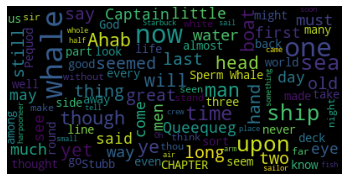

In [144]:
# word cloud for melville-moby-dick
melville_corpus = nltk.corpus.gutenberg.raw('melville-moby_dick.txt')
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(str(melville_corpus))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

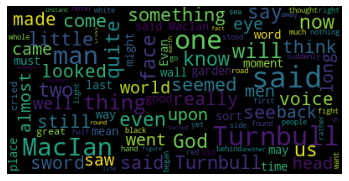

In [145]:
# word cloud for melville-moby-dick
chesterton_corpus = nltk.corpus.gutenberg.raw('chesterton-ball.txt')
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(str(chesterton_corpus))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

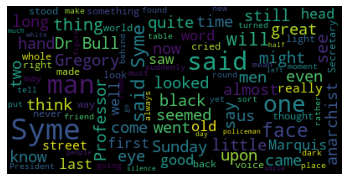

In [146]:
# word cloud for melville-moby-dick
chesterton_corpus = nltk.corpus.gutenberg.raw('chesterton-thursday.txt')
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(str(chesterton_corpus))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [147]:
y_train_tfidfV_ngram

488    chesterton
746    chesterton
570    chesterton
751    chesterton
421    chesterton
          ...    
70        burgess
585    chesterton
72        burgess
768    chesterton
879      melville
Name: Author, Length: 600, dtype: object

In [148]:
from mlxtend.evaluate import bias_variance_decomp

# X_train_tfidfV_ngram, X_test_tfidfV_ngram, y_train_tfidfV_ngram, y_test_tfidfV_ngram = train_test_split(X_train_tfidf_ngram , dataset_tfidfV_ngram_target, test_size=0.4, random_state=0)

# estimate bias and variance
clf_dropped = SVC(kernel= 'linear')
mse, bias, var = bias_variance_decomp(clf_dropped, X_train_tfidfV_ngram.to_numpy(), np.array(string_to_integer(y_train_tfidfV_ngram)), X_test_tfidfV_ngram.to_numpy(), np.array(string_to_integer(y_test_tfidfV_ngram)), loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 1.081
Bias: 0.772
Variance: 0.309
